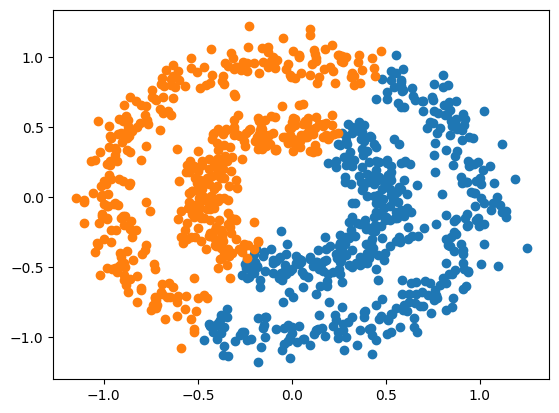

In [15]:
# kmeans의 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음, 군집 개수를 직접 지정해야 함
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(2)

# factor : 내부 원과 외부 원 사이의 비율
X1, y1 = make_circles(n_samples=1000, factor=0.5, noise=0.09)
model = KMeans(n_clusters=2, random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_ == 0, 0], X1[model.labels_ == 0, 1])
plt.scatter(X1[model.labels_ == 1, 0], X1[model.labels_ == 1, 1])

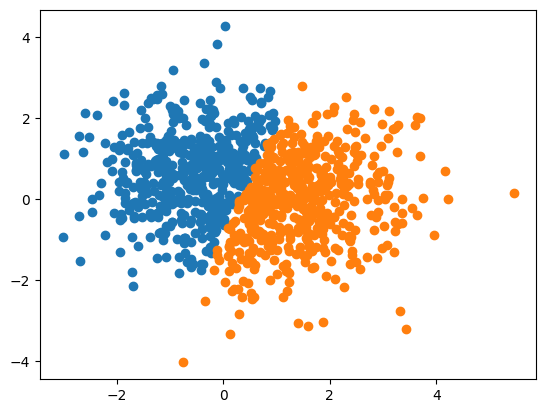

In [16]:
from sklearn.datasets import make_moons

X2, y2 = make_moons(n_samples=1000, noise=1)
model = KMeans(n_clusters=2, random_state=10)
model.fit(X2)

plt.scatter(X2[model.labels_ == 0, 0], X2[model.labels_ == 0, 1])
plt.scatter(X2[model.labels_ == 1, 0], X2[model.labels_ == 1, 1])

In [17]:
# DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화

# 데이터의 밀도에 기반한 군집화
# 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식
# 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
# 군집의 갯수를 사용자가 지정할 필요가 없음

# 최소거리(이웃을 정의하기 위한 거리), 최소 데이터 갯수(밀집지역을 정의하기 위해 필요한 이웃의 갯수)

DBSCAN(eps=3, min_samples=2)


ValueError: x and y must be the same size

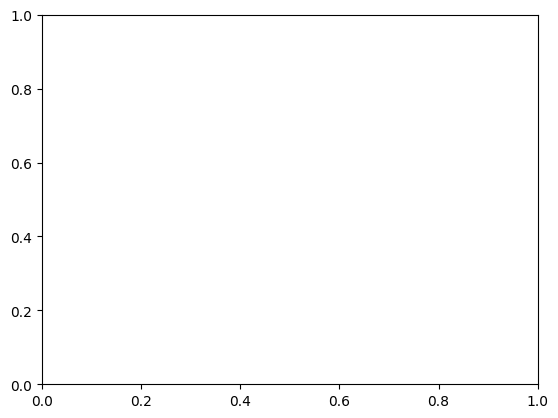

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([[1, 2], [2, 2], [2, 5], [8, 7], [8, 10], [25, 80], [27, 78], [40, 50]])

# 최소거리 3, 최소샘플갯수 2개
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5

model = DBSCAN(eps=3, min_samples=2).fit(X)
print(model)
plt.scatter(X[:, 0], X[:1], c=model.labels_)
print(model.labels_)  # 3개로 나눠짐(-1은 노이즈가 있는 데이터, 아웃라이어)

In [ ]:
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

In [ ]:
import pandas as pd

df = pd.read_csv("d:/data/iris/iris.csv")
df.columns

In [ ]:
cols = df.columns[:-2]
X = df[cols]
y = df["Species"]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(eps=0.5, min_samples=5)
pipeline = make_pipeline(scaler, model)

pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns = ["predict"]

result = pd.concat([X, y, pred], axis=1)
result

In [ ]:
# 노이즈가 있는 샘플들은 -1로 처리됨
model.labels_

In [ ]:
plt.figure(figsize=(14.7))
colormap = np.array(["red", "lime", "black"])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(result["SepalLength"], result["SepalWidth"], c=colormap[y], s=40)
plt.title("real")

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(
    result["SepalLength"], result["SepalWidth"], c=colormap[model.labels_], s=40
)
plt.title("clustering")

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    result["SepalLength"],
    result["SepalWidth"],
    result["PetalLength"],
    c=result["predict"],
    alpha=0.5,
)
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
plt.show()